In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Membaca data dari CSV
df = pd.read_csv('D:/Coding/Semester 5/Capstone/MLTrain/data/ObesityDataSet_raw_and_data_sinthetic.csv')

# Menampilkan beberapa baris pertama
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Coding/Semester 5/Capstone/MLTrain/data/ObesityDataSet_raw_and_data_sinthetic.csv'

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.shape

(2111, 17)

In [5]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

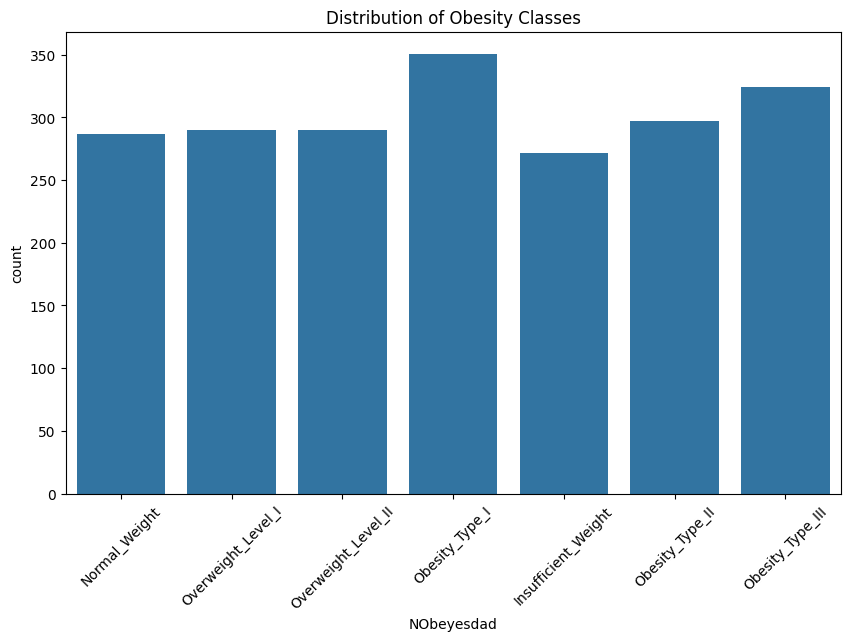

In [6]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of Obesity Classes')
plt.xticks(rotation=45)
plt.show()

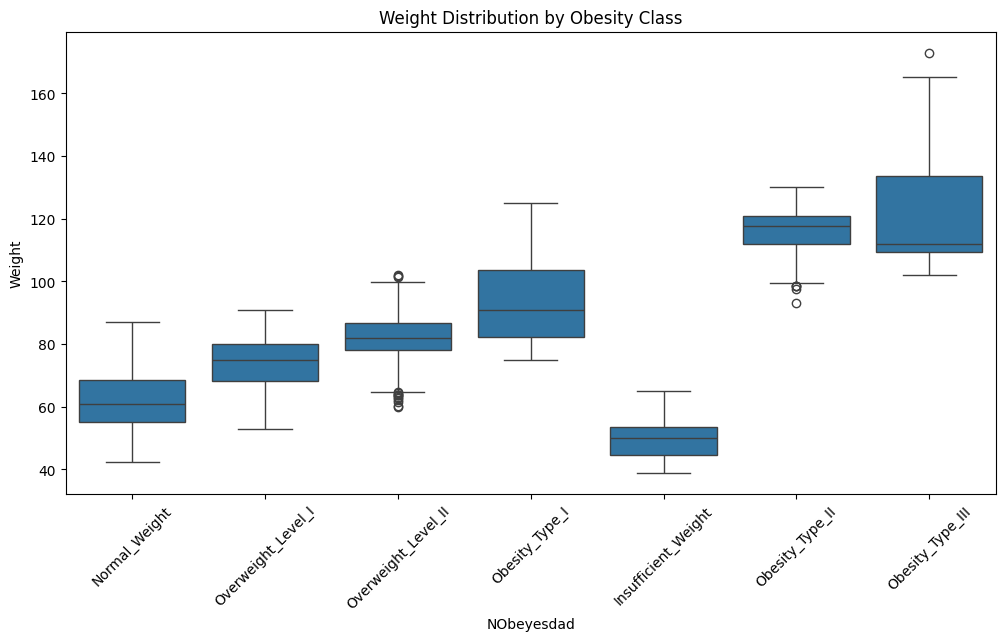

In [7]:
# Visualisasi hubungan antara fitur dan target
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='NObeyesdad', y='Weight')
plt.title('Weight Distribution by Obesity Class')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Menghitung nilai yang hilang
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


## Data Preprocessing

In [9]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']
df['Weight'] = df['Weight'].round(1)
df['Height'] = df['Height'].round(2)

In [10]:
for x in ['Age','Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())


Age : min: 14 max: 61 int64
[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]
Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Family History with Overweight','Frequent consumption of high caloric food', 'Consumption of food between meals', 'Smoke', 'Calories consumption monitoring','Consumption of alcohol', 'Transportation used', 'Obesity']

label_encoders = {}

for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [12]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21,1.62,64.0,1,0,2,3,2,0,2,0,0,1,3,3,1
1,Female,21,1.52,56.0,1,0,3,3,2,1,3,1,3,0,2,3,1
2,Male,23,1.80,77.0,1,0,2,3,2,0,2,0,2,1,1,3,1
3,Male,27,1.80,87.0,0,0,3,3,2,0,2,0,2,0,1,4,5
4,Male,22,1.78,89.8,0,0,2,1,2,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.4,1,1,3,3,2,0,2,0,2,1,2,3,4
2107,Female,22,1.75,133.7,1,1,3,3,2,0,2,0,1,1,2,3,4
2108,Female,23,1.75,133.7,1,1,3,3,2,0,2,0,1,1,2,3,4
2109,Female,24,1.74,133.3,1,1,3,3,2,0,3,0,1,1,2,3,4


In [13]:
df['Obesity'].unique()

array([1, 5, 6, 2, 0, 3, 4])

In [14]:
df['Transportation used'].unique()

array([3, 4, 0, 2, 1])

In [15]:
df['Consumption of alcohol'].unique()

array([3, 2, 1, 0])

In [16]:
df.shape

(2111, 17)

In [17]:
# label_encoder = LabelEncoder()
# df['Obesity'] = label_encoder.fit_transform(df['NObeyesdad'])

# Memisahkan fitur dan target
X = df.drop(columns=['Obesity'])  # Menghapus kolom target dan kolom yang tidak diperlukan
y = df['Obesity'].values

# Mengonversi fitur kategorikal menjadi dummy variables
X = pd.get_dummies(X)

# Normalisasi fitur
scaler = StandardScaler()
for column in X.columns:
    if column not in categorical_cols:
      X[column] = scaler.fit_transform(X[[column]])

X = X.values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konversi data ke tensor untuk TensorFlow
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Menampilkan bentuk data
print(f"Training data shape: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Testing data shape: {X_test_tensor.shape}, {y_test_tensor.shape}")

Training data shape: (1688, 17), (1688,)
Testing data shape: (423, 17), (423,)


In [18]:
X_train[0]

array([-0.52174122, -0.76725159, -1.01531482,  1.        ,  1.        ,
        0.9875586 ,  0.38564411,  0.        ,  1.        , -0.02133042,
        0.        ,  1.10959898, -0.98629521,  2.        ,  3.        ,
        1.01191369, -1.01191369])

## Training Data

In [19]:
# Membangun model
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1], ), kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

# Mengompilasi model
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Using Adam optimizer with specified learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4608      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 8)                 2

In [21]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100


22/22 [==============================] - 3s 22ms/step - loss: 3.7108 - accuracy: 0.2400 - val_loss: 3.1871 - val_accuracy: 0.4556
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 2.9284 - accuracy: 0.3852 - val_loss: 2.3815 - val_accuracy: 0.5710
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 2.2551 - accuracy: 0.5156 - val_loss: 1.8166 - val_accuracy: 0.6095
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7942 - accuracy: 0.5933 - val_loss: 1.4699 - val_accuracy: 0.7337
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 1.4801 - accuracy: 0.6726 - val_loss: 1.2667 - val_accuracy: 0.7308
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 1.2950 - accuracy: 0.7000 - val_loss: 1.0343 - val_accuracy: 0.8462
Epoch 7/100
22/22 [==============================] - 0s 10ms/step - loss: 1.1698 - accuracy: 0.7319 - val_loss: 0.9426 - val_accuracy: 0.8580
Epoch 8/

14/14 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.9433
Test Accuracy: 0.9433


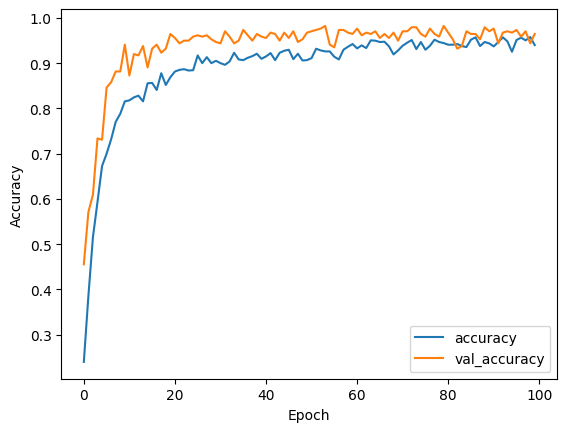

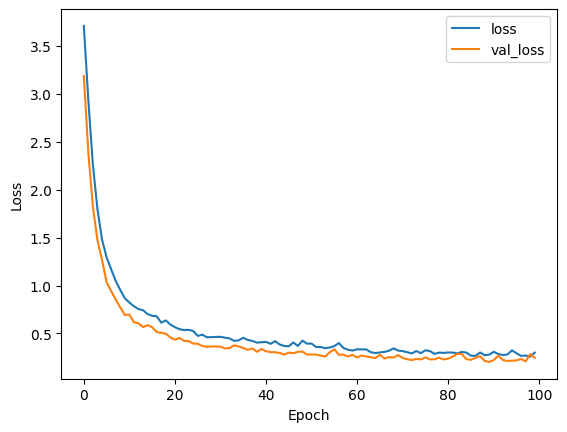

In [22]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Menampilkan grafik akurasi dan loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
# Menyimpan model
# model.save('obesity_classification_model.keras')
model.save("./models/model.h5", save_format="h5")

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# 1. Muat model yang sudah dilatih
model = tf.keras.models.load_model('obesity_classification_model.h5')  # Ganti dengan path model Anda

# 2. Input data baru untuk prediksi dengan hanya 18 fitur yang diperlukan
# Pastikan data yang dimasukkan sesuai dengan fitur yang diinginkan oleh model

# Data input sesuai dengan struktur yang diharapkan oleh model
# Menggunakan data baru (input data yang benar-benar terstruktur sesuai model)
input_data = np.array([[1,   # Gender (1 = Male)
                       27,  # Age (Usia 21 tahun)
                       1.64, # Height (Tinggi 164 cm)
                       74,  # Weight (Berat badan 70 kg)
                       0,   # Family History (0 = Tidak ada riwayat obesitas)
                       0,   # Frequent High Caloric Food Consumption ()
                       3,   # Frequency VEgetables (0 = Tidak pernah berolahraga)
                       3,   # Number of main meals (2 = Lebih dari 2 jam sehari)
                       2,   # Food between (1 = Kebiasaan makan baik)
                       0,   # Smoking (0 = Tidak merokok)
                       2,   # Water Daily (0 = Tidak konsumsi alkohol)
                       0,   # Calories Consum Mon (1 = Lebih dari 8 gelas per hari)
                       2,   # Physical Frequency (0 = Tidak memantau kalori)
                       0,   # Time Using Devices (1 = Sering makan di antara waktu makan)
                       1,   # Alcohol (2 = 3 kali sehari)
                       4,   # Transportasion (1 = Sering makan sayuran)
                       1 ]])  # Obesity (3 = 3 kali makan utama sehari)


# 3. Pastikan data input sesuai dengan model yang sudah dilatih
# Jika model mengharuskan input dalam bentuk array dengan ukuran tertentu, pastikan input_data memiliki dimensi yang benar
input_data = input_data.astype(np.float32)  # Pastikan tipe data sesuai

# 4. Prediksi kelas obesitas
predictions = model.predict(input_data)

# 5. Ambil kelas obesitas yang diprediksi
predicted_class = np.argmax(predictions, axis=1)

# 6. Konver4si angka kelas menjadi label kelas
# Daftar label kelas obesitas asli (urutannya sesuai saat pelatihan)
obesity_labels = [
    "Underweight", "Normal weight", "Obesity Type I",
    "Obesity Type II", "Obesity Type III", "Overweight Level I", "Overweight Level II"
]

predicted_label = [obesity_labels[i] for i in predicted_class]

# 7. Output hasil prediksi
print("Prediksi Probabilitas:", predictions)
print("Kelas Obesitas yang Diprediksi:", predicted_label)
